In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

In [157]:
df = pd.read_csv("supermarket_sales.csv")

In [158]:
#create datettime column
df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = df['DateTime'].astype('datetime64[ns]')
df.drop(['Date','Time'], inplace=True, axis=1)
df['Month'] = df['DateTime'].apply(lambda x: x.month)
df['Day'] = df['DateTime'].apply(lambda x: x.day)

### What are the data types?

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [116]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,2


### Distribution of product lines across different branches

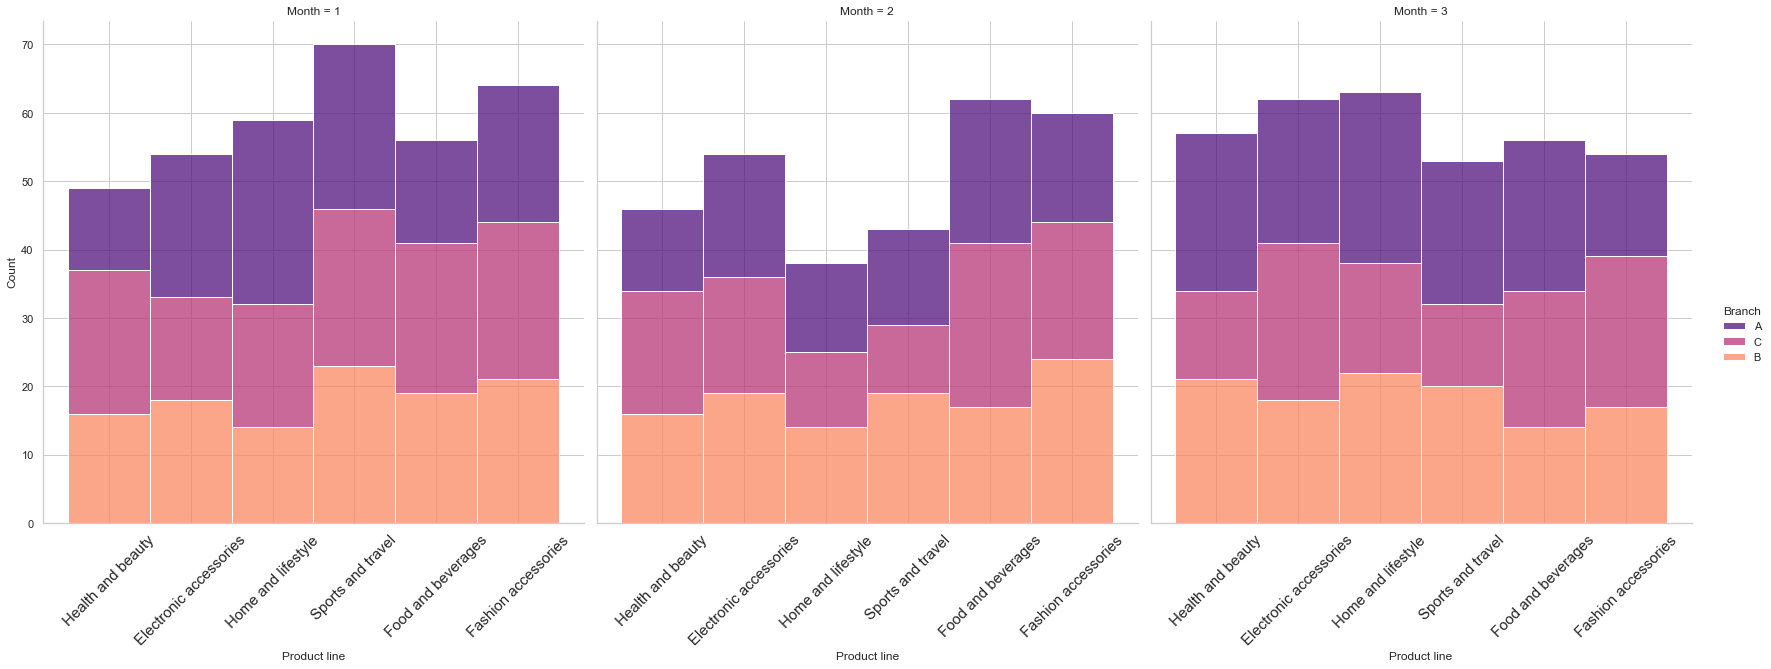

In [422]:
g = sns.displot(
    data=df,
    hue = 'Branch',
    col = 'Month',
    x = 'Product line',
    kind = 'hist',
    aspect = 1,
    multiple = 'stack',
    height = 8,
    palette = 'magma'
)

g.set_xticklabels(rotation=45, fontsize = 15)
#g.ax.set_ylabel('Total')
#g.ax.set_title('Distribution of product lines across different branches')
plt.show()

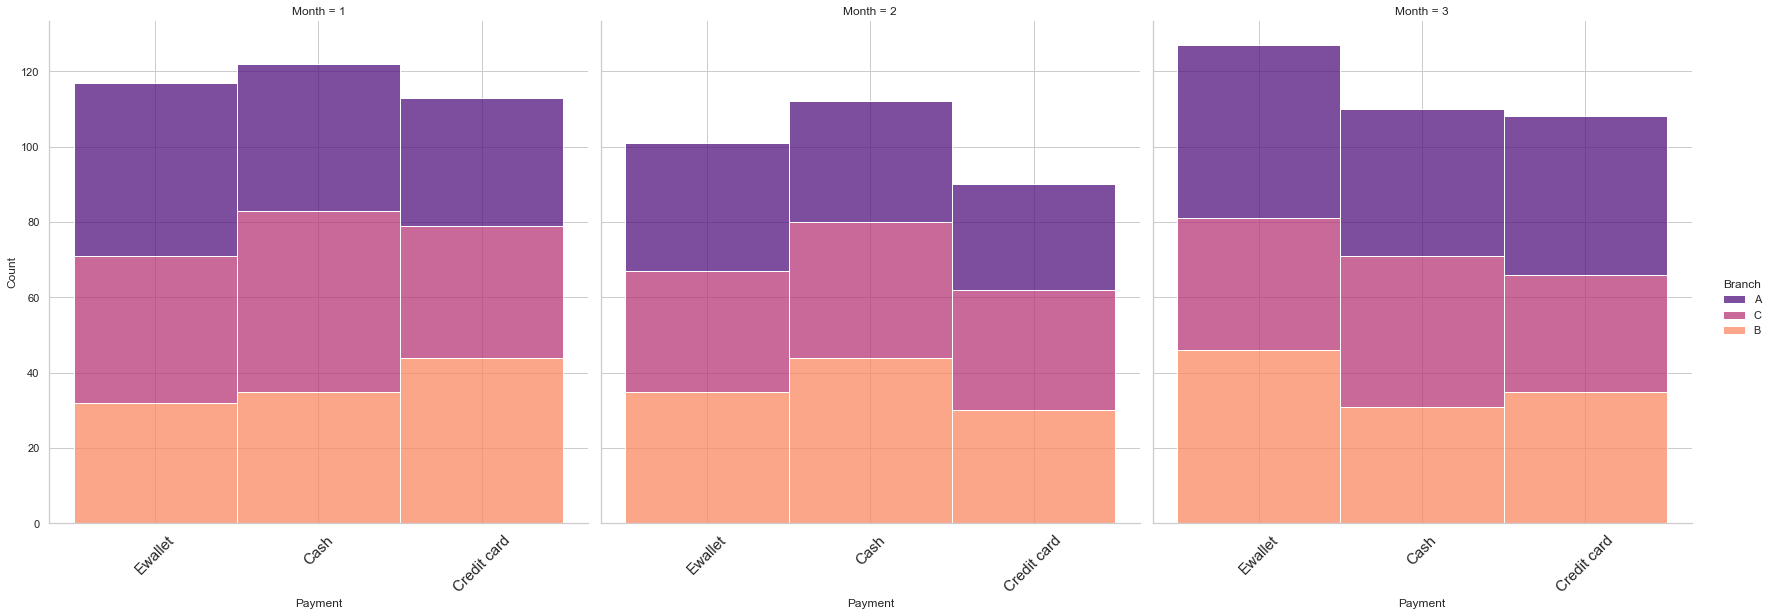

In [430]:
g = sns.displot(
    data=df,
    hue = 'Branch',
    col = 'Month',
    x = 'Payment',
    kind = 'hist',
    aspect = 1,
    multiple = 'stack',
    height = 8,
    palette = 'magma'
)

g.set_xticklabels(rotation=45, fontsize = 15)
#g.ax.set_ylabel('Total')
#g.ax.set_title('Distribution of product lines across different branches')
plt.show()

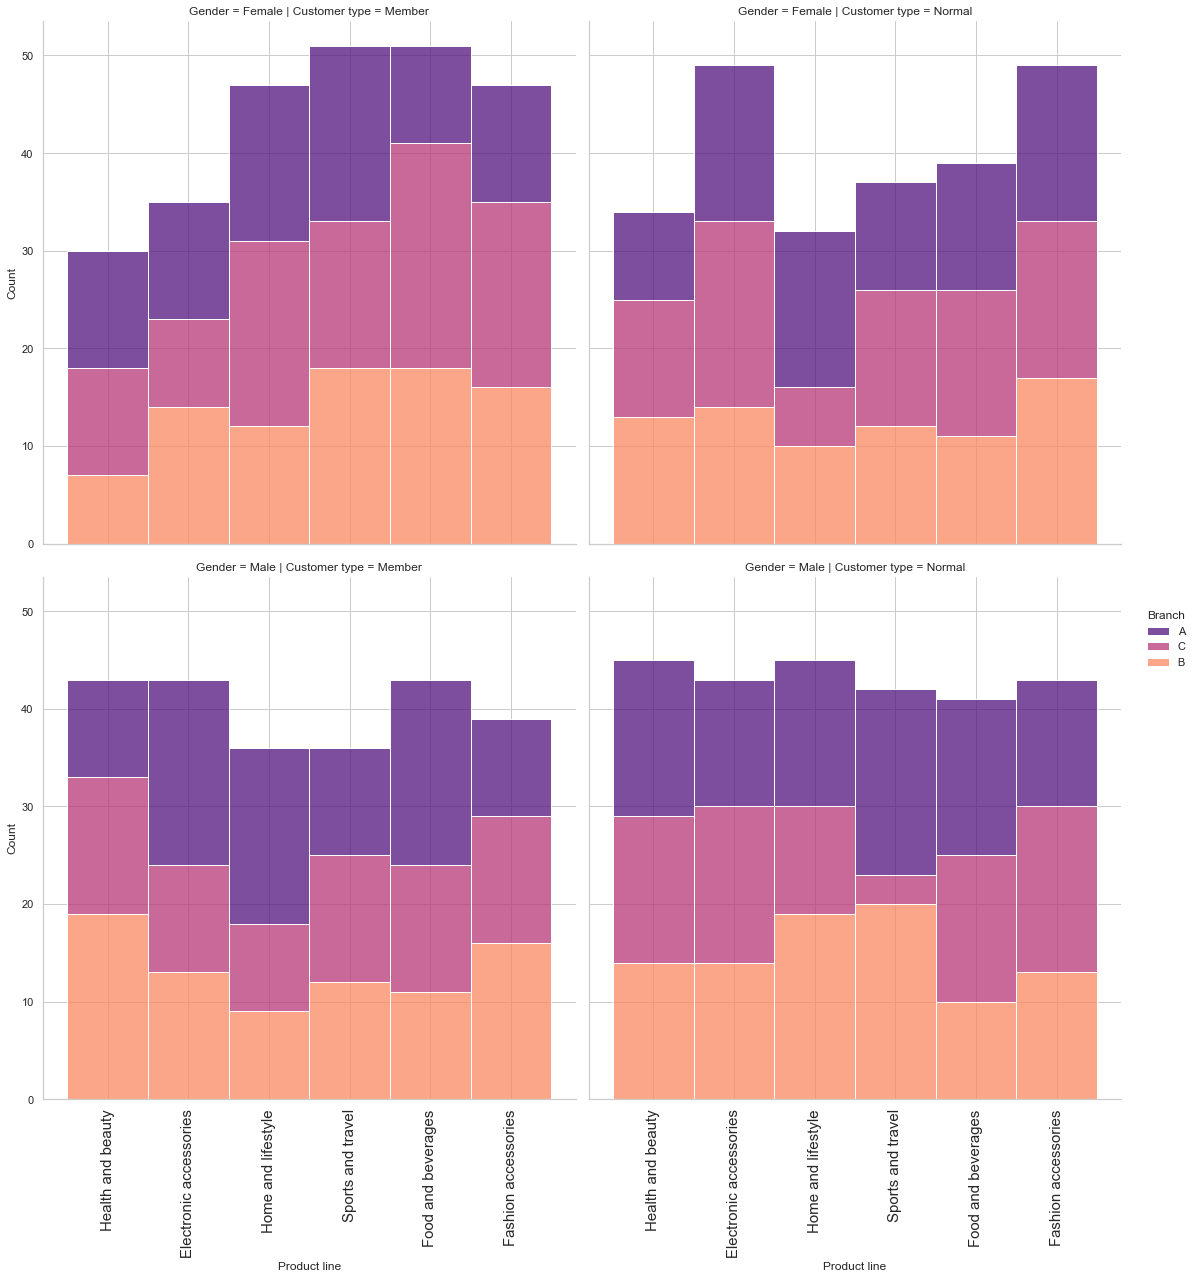

In [432]:
g = sns.displot(
    data=df,
    hue = 'Branch',
    col = 'Customer type',
    row = 'Gender',
    x = 'Product line',
    kind = 'hist',
    aspect = 1,
    multiple = 'stack',
    height = 8,
    palette = 'magma'
)

g.set_xticklabels(rotation=90, fontsize = 15)
#g.ax.set_ylabel('Total')
#g.ax.set_title('Distribution of product lines across different branches')
plt.show()

### How many transactions are there each day of the month? 

In [423]:
df_daily_count = df.pivot_table(index=['Month', 'Day'], aggfunc='count', values = ['Total'], columns = 'Branch')
df_daily_count
#df_daily_count.index.get_level_values(1)

Total          
Branch        A    B    C
Month Day                
1     1     5.0  3.0  4.0
      2     2.0  4.0  2.0
      3     3.0  3.0  2.0
      4     2.0  3.0  1.0
      5     5.0  3.0  4.0
...         ...  ...  ...
3     26    6.0  3.0  4.0
      27    5.0  4.0  1.0
      28    6.0  1.0  3.0
      29    2.0  4.0  2.0
      30    4.0  3.0  4.0

[89 rows x 3 columns]

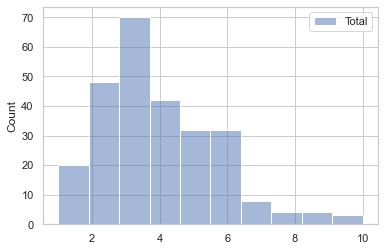

In [429]:
g = sns.histplot(
    data = df_daily_count,
)

#g.ax.set_xticks(df_daily_count.Total.unique())
plt.show()

In [393]:
df_daily_sum = df.pivot_table(index=['Month', 'Day'], aggfunc='sum', values = ['Total'])
df_daily_sum
#df_daily_count.index.get_level_values(1)

Total
Month Day           
1     1    4745.1810
      2    1945.5030
      3    2078.1285
      4    1623.6885
      5    3536.6835
...              ...
3     26   1962.5130
      27   2902.8195
      28   2229.4020
      29   4023.2430
      30   4487.0595

[89 rows x 1 columns]

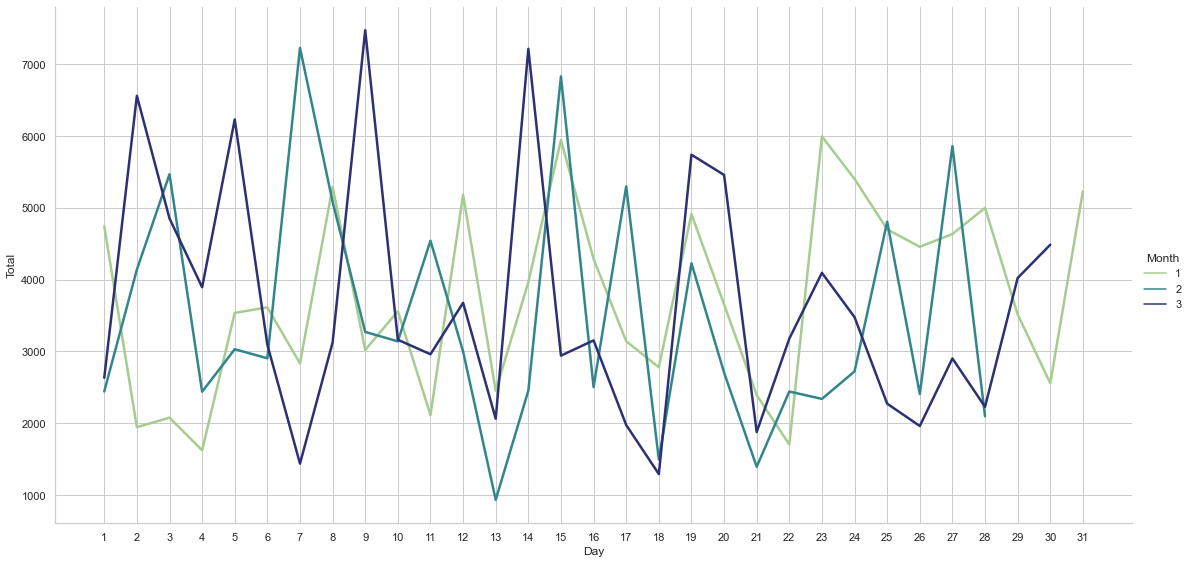

In [408]:
g = sns.relplot(
    data = df_daily_sum,
    hue = 'Month',
    x = 'Day',
    y = 'Total',
    kind = 'line',
    lw = 2.5,
    aspect = 2,
    height = 8,
    palette = 'crest'
)

g.ax.set_xticks([i for i in range (1, 32)])
plt.show()

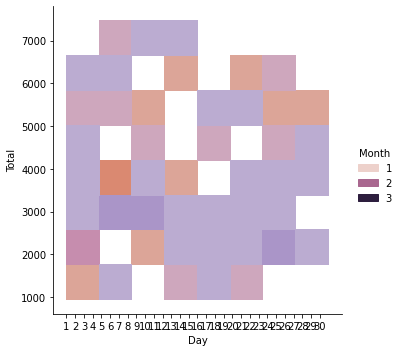

In [280]:
g = sns.displot(
    data=df.groupby(['Month', 'Day'])[['Total']].sum(),
    hue = 'Month',
    x = 'Day',
    y = 'Total',
    kind = 'hist',
    #aspect = 2,
    #height = 8
)

g.ax.set_xticks([i for i in range (1, 31)])
plt.show()